<a href="https://colab.research.google.com/github/yanghoonkim/FinML/blob/main/notebooks/simple_mean_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install


In [1]:
!git clone https://github.com/yanghoonkim/FinML
!mv /content/FinML/* .
!rm -rf FinML

!pip3 install -r requirements.txt

Cloning into 'FinML'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 259 (delta 120), reused 187 (delta 59), pack-reused 0
Receiving objects: 100% (259/259), 52.50 KiB | 5.25 MiB/s, done.
Resolving deltas: 100% (120/120), done.
     |████████████████████████████████| 286kB 6.0MB/s 


# Config
아래에서 symbol에 원하는 종목의 symbol을, 
start_date와 end_date에 분석할 기간의 시작시점과 끝 시점을 넣어주세요.

In [2]:
args = {
  "symbols": [
    "AAPL",
    "TSLA",
  ],
  "start_date": "2020.01.01",
  "end_date": "2020.12.31"
}

In [3]:
import os
import json

# save config.json
base_dir = os.getcwd()
with open(os.path.join(base_dir, "config.json"), "w") as config:
    json.dump(args, config)

# 메인 코드 실행

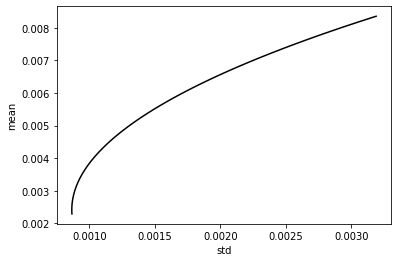

In [4]:
import os
import json
import dateparser

from finml.data_reader import StockMarket
from finml.portfolio_optimization import SimpleMeanVariance
from finml.utils.path_utils import set_path

########################################################################################################################
# INIT
########################################################################################################################
base_dir = os.getcwd()

# read config
with open(os.path.join(base_dir, "config.json"), "r") as config:
    args = json.load(config)

with open(os.path.join(base_dir, "config_system.json"), "r") as config_system:
    args_system = json.load(config_system)

# param
pwd = os.getcwd()
start_date = dateparser.parse(args['start_date'])
end_date = dateparser.parse(args['end_date'])
data_dir = set_path(os.path.join(pwd, args_system['path_dir']['data_dir']))
log_dir = set_path(os.path.join(pwd, args_system['path_dir']['log_dir']))
symbols = args['symbols']

########################################################################################################################
# MAIN
########################################################################################################################
# get data
market = StockMarket(start_date=start_date, end_date=end_date, data_dir=data_dir)
market.get_stock_price(symbols)
market_mean, market_covariance, _ = market.get_stock_statistics()

# simple mean-variance plot
SMV = SimpleMeanVariance(market_mean, market_covariance)
SMV.plot(show=True, save_path=log_dir)